In [21]:
[globals().pop(var) for var in dir() if not var.startswith("__")]

import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelBinarizer
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder


fc_new = pd.read_csv('transactions_n100000.csv')

profile = ProfileReport(fc_new)
profile.to_file("HW2_Report.html")


item_encoder = LabelBinarizer()
item_encoder.fit(fc_new['item_name'])
transformed = item_encoder.transform(fc_new['item_name'])
ohe_df = pd.DataFrame(transformed)
fc_new = pd.concat([fc_new, ohe_df], axis=1)

for i in range(4):
    fc_new[i] = fc_new[i]*fc_new['item_count']
    
fc_new.rename(columns = {0:'Burger', 1:'Fries', 2:'Salad', 3:'Shake'}, inplace=True)

fc_new.drop(['lat','long','item_count','item_name'],axis=1, inplace=True)

fc_new['order_timestamp']=pd.to_datetime(fc_new['order_timestamp'], format='%Y-%m-%d %H:%M')

fc_new['order_timestamp'] = fc_new['order_timestamp'].apply(lambda x: 0 if 11 <= x.hour <= 16 else(1 if 16<=x.hour <= 21 else (2 if x.hour > 22 else 2)))

df = fc_new.groupby('ticket_id').agg({'order_timestamp':'mean','location':'mean', 'Burger':'sum', 'Fries':'sum', 'Salad':'sum', 'Shake':'sum'})

df = pd.get_dummies(data=df, columns=['order_timestamp', 'location'])

{1: 967191.7092101604, 2: 441987.91850351007, 3: 308423.18127781374, 4: 263464.33889351663, 5: 220321.7769683757, 6: 199689.48652965098, 7: 174502.67207871587, 8: 164342.85346544645, 9: 158098.32128796968, 10: 148413.86096679306, 11: 138984.11006929455, 12: 133040.09767872514, 13: 129939.13082811964, 14: 125144.48623091848, 15: 119618.86608087058, 16: 115136.03068566692, 17: 110642.97787602489, 18: 108641.17859465288, 19: 103206.52170856012}


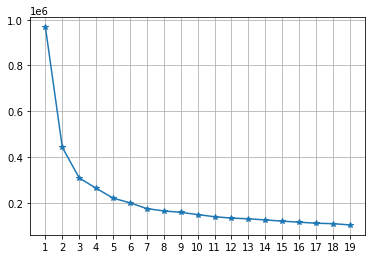

In [22]:
inertias = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(df)
    inertias[k] = kmeans.inertia_
print(inertias)


ax = plt.subplot()
ax.plot(list(inertias.keys()), list(inertias.values()), '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [23]:
df.to_csv('result2.csv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
df = pd.read_csv('result.csv')
feature_x = [tag for tag in df.columns if tag not in ['ticket_id']]
X = df[feature_x].values
X

array([[0, 3, 3, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 2, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [3, 3, 0, ..., 0, 0, 0]])

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X)
y_pred = list(y_pred)

In [6]:
df['cluster']=y_pred
df

,ticket_id,Burger,Fries,Salad,Shake,order_timestamp_0,order_timestamp_1,order_timestamp_2,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,cluster
0,0x100048,0,3,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0x100057,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2
2,0x1000ba,1,2,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0x1000fb,4,5,1,4,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0x10016e,3,3,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0xffddf,3,3,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0
99996,0xffe25,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2
99997,0xffec9,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
99998,0xffedb,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2


In [7]:
df.to_csv('result.csv')